#Description: SVM / SVR Testing

In [195]:
#imports
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR # Support Vector Regression model
#rom sklearn.model_selection import train_test_split


In [196]:
#Load the data - stock data from YAHOO
#from google.colab import files
#uploaded = files.upload()
df = pd.read_csv('FB.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-14,182.520004,183.490005,178.100006,180.729996,180.729996,17628100
1,2019-05-15,180.419998,187.279999,180.020004,186.270004,186.270004,16746900
2,2019-05-16,185.050003,188.580002,185.050003,186.990005,186.990005,12953100
3,2019-05-17,184.839996,187.580002,184.279999,185.300003,185.300003,10485400
4,2019-05-20,181.880005,184.229996,181.369995,182.720001,182.720001,10352000
5,2019-05-21,184.570007,185.699997,183.889999,184.820007,184.820007,7502800
6,2019-05-22,184.729996,186.740005,183.610001,185.320007,185.320007,9213800
7,2019-05-23,182.419998,183.899994,179.669998,180.869995,180.869995,12768800
8,2019-05-24,182.330002,183.630005,180.830002,181.059998,181.059998,8807700
9,2019-05-28,181.539993,184.710007,181.449997,184.309998,184.309998,14843300


In [197]:
#Create the lists / X (independent) and Y (dependent) dataset
dates = []
prices = []


In [198]:
# Get rows and cols from dataset
df.shape

(253, 7)

In [199]:
# print last row of data (this will be the test data)
target_row = df.tail(1)
target_data = target_row.loc[:,'Open']
for elem in target_data:
    target = elem


In [200]:
#Split data
df = df.head(len(df)-171)
print(df.shape)

(82, 7)


In [201]:
df_dates = df.loc[:,'Date'] # all rows from Date col
df_open = df.loc[:,'Open'] # all rows from Open col

In [202]:
#Create the independent data set 'X' as dates
count = 1
for date in df_dates:
  #dates.append([int(date.split('-')[2])])
  #dates.append([int(date.replace('-', ''))])
    dates.append([count])
    count = count+1
print(count)

#Create dependent dataset 'Y' as prices
for open_price in df_open:
  prices.append(float(open_price))


83


In [203]:
#See what days where recorded in the dataset
print(dates)

[[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82]]


In [204]:
# Three different SVR models with different kernels
def predict_prices(dates, prices, x):
    print("started..")

    #Create 3 SVR models C = error term
    #Train models in the dates and prices
    
    # Linear kernel
    svr_lin = SVR(kernel='linear', C=1e3)
    svr_lin.fit (dates, prices)
    print("finished linear..")
    
    # Polynomial Kernel
    svr_poly = SVR(kernel='poly', C=1e3, degree=4, gamma='scale')
    svr_poly.fit(dates, prices)
    print("finished poly..")
    
    # Radial Basis Kernel
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma='scale')
    svr_rbf.fit (dates, prices)
    print("finished rbf..")
    
    # Printable results
    result_lin = str(round(svr_lin.predict(x)[0],2))
    result_poly= str(round(svr_poly.predict(x)[0],2))
    result_rbf = str(round(svr_rbf.predict(x)[0],2))

    # Plot preset
    plt.figure(dpi=600)
    
    #Plot models on a graph the see which one has the best fit
    plt.scatter(dates,prices,color = 'black', label='Target: '+str(target))
    plt.scatter(dates,svr_lin.predict(dates),color = 'green', label='Linear: '+result_lin)
    plt.scatter(dates,svr_poly.predict(dates),color = 'red', label='Poly: '+result_poly)
    plt.scatter(dates,svr_rbf.predict(dates),color = 'blue', label='RBF: '+result_rbf)

    plt.title('Support Vector Regression models')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
    #plt.savefig('SVR-plot.png', dpi=600)

    #return all three model predictions
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

started..
finished linear..
finished poly..
finished rbf..


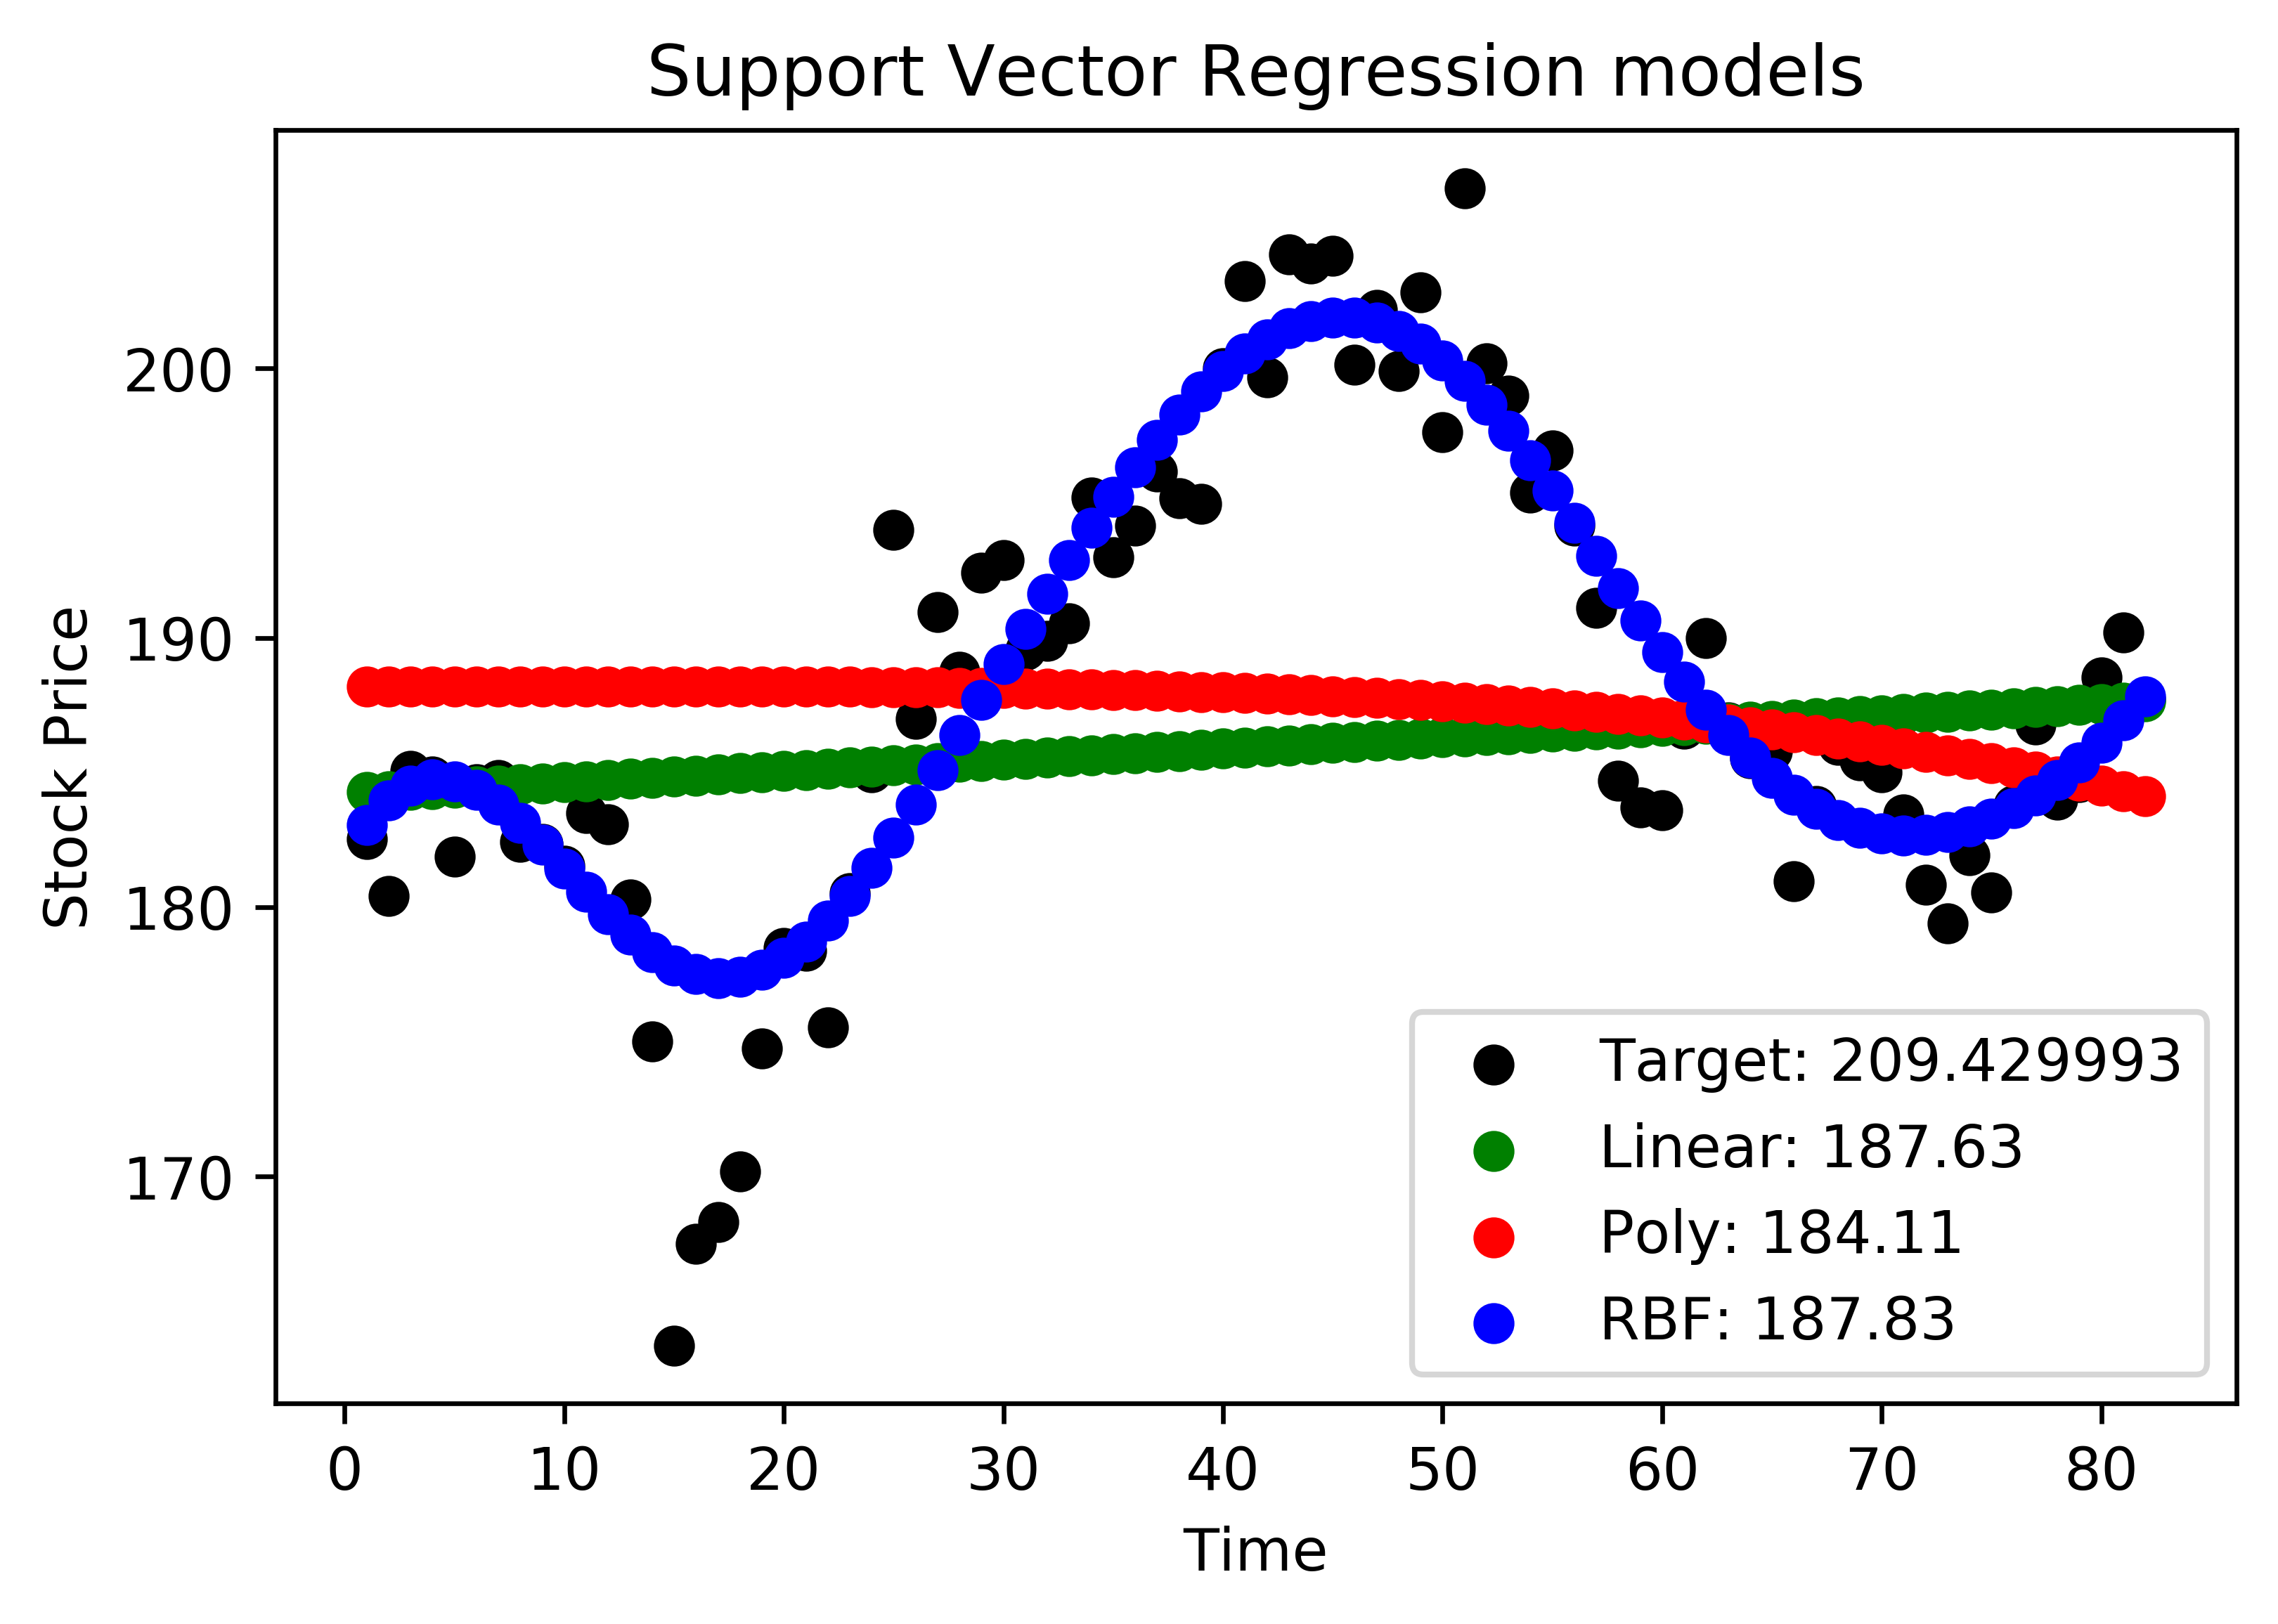

Prediction: (187.8300574436002, 187.62999600925252, 184.1141910730635)
Target: 209.429993


In [205]:
#Predict price of stock on given (last or similar) day
predicted_price = predict_prices(dates,prices,[[82]])
print('Prediction: '+str(predicted_price))
print('Target: '+str(target))
